C:\Users\user\AppData\Local\Temp\ipykernel_9872\3031626733.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna('unknown', inplace=True)


🔥 Hottest day: 2007-07-22 - Temp: 39.90555555555555 °C
❄️ Coldest day: 2012-02-10 - Temp: -21.822222222222223 °C


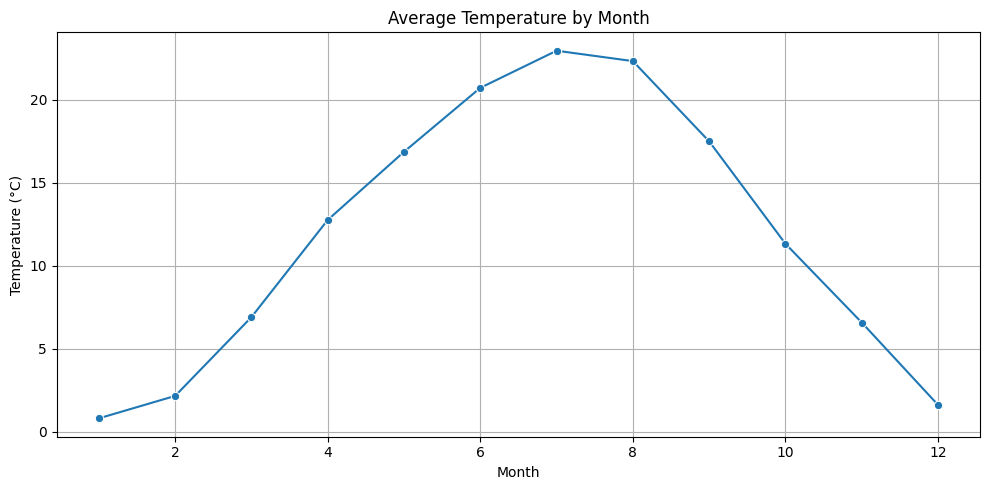

C:\Users\user\AppData\Local\Temp\ipykernel_9872\3031626733.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precip_type_counts.index, y=precip_type_counts.values, palette='coolwarm')


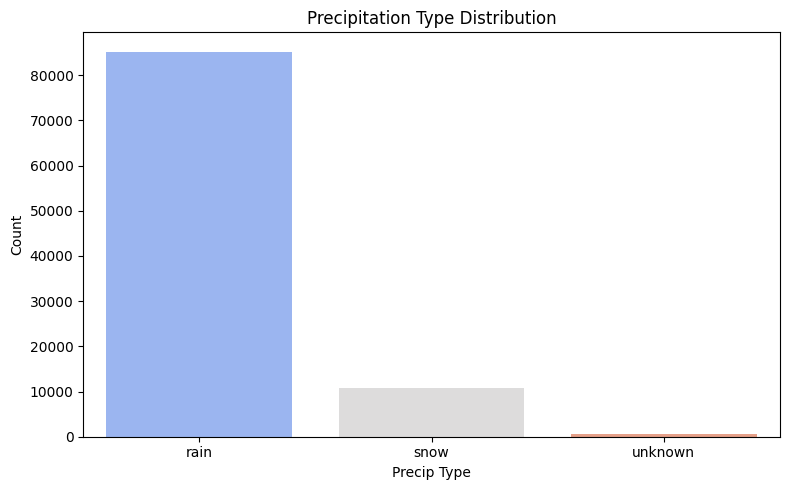

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("weatherHistory.csv")


df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['year'] = df['Formatted Date'].dt.year
df['month'] = df['Formatted Date'].dt.month


df.drop(columns=['Loud Cover', 'Daily Summary'], inplace=True)


df['Precip Type'].fillna('unknown', inplace=True)


monthly_avg_temp = df.groupby('month')['Temperature (C)'].mean()


precip_type_counts = df['Precip Type'].value_counts()

hottest = df.loc[df['Temperature (C)'].idxmax()]
coldest = df.loc[df['Temperature (C)'].idxmin()]

print("🔥 Hottest day:", hottest['Formatted Date'].date(), "- Temp:", hottest['Temperature (C)'], "°C")
print("❄️ Coldest day:", coldest['Formatted Date'].date(), "- Temp:", coldest['Temperature (C)'], "°C")

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, marker='o')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x=precip_type_counts.index, y=precip_type_counts.values, palette='coolwarm')
plt.title('Precipitation Type Distribution')
plt.ylabel('Count')
plt.xlabel('Precip Type')
plt.tight_layout()
plt.show()
